In [1]:
import timeit
import numpy as np
import common

In [2]:
INITIAL_CONDITION = "solar_system"

# Default units is AU, days, and M_sun
TF = 200.0 * 365.24  # years to days
DT = 1.0
OUTPUT_INTERVAL = 0.1 * 365.24  # years to days
NUM_STEPS = int(TF / DT)

----------------------------------------------------------
Simulation Info:
num_particles: 9
G: 0.00029591220828411956
tf: 73048.0 days (Actual tf = dt * num_steps = 73048.0 days)
dt: 1.0 days
Num_steps: 73048

Output interval: 36.524 days
Estimated solution size: 2001
----------------------------------------------------------
Current time: 73012.00 days
Done! Runtime: 0.653 seconds, Solution size: 2000


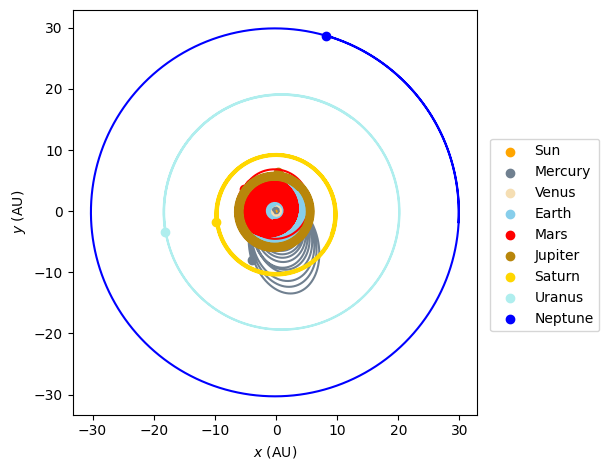

In [3]:
# Get initial conditions
system, labels, colors, legend = common.get_initial_conditions(INITIAL_CONDITION)

# Initialize memory
a = np.zeros((system.num_particles, 3))

# Solution array
sol_size = int(TF // OUTPUT_INTERVAL + 2)  # +2 for initial and final time
sol_x = np.zeros((sol_size, system.num_particles, 3))
sol_v = np.zeros((sol_size, system.num_particles, 3))
sol_t = np.zeros(sol_size)
sol_x[0] = system.x
sol_v[0] = system.v
sol_t[0] = 0.0
output_count = 1

# Launch simulation
common.print_simulation_info_fixed_step_size(
    system, TF, DT, NUM_STEPS, OUTPUT_INTERVAL, sol_size
)
next_output_time = output_count * OUTPUT_INTERVAL
start = timeit.default_timer()
for i in range(NUM_STEPS):
    common.euler(a, system, DT)

    current_time = i * DT
    if current_time >= next_output_time:
        sol_x[output_count] = system.x
        sol_v[output_count] = system.v
        sol_t[output_count] = current_time

        output_count += 1
        next_output_time = output_count * OUTPUT_INTERVAL

        print(f"Current time: {current_time:.2f} days", end="\r")

sol_x = sol_x[:output_count]
sol_v = sol_v[:output_count]
sol_t = sol_t[:output_count]

end = timeit.default_timer()

print()
print(f"Done! Runtime: {end - start:.3g} seconds, Solution size: {output_count}")
common.plot_trajectory(
    sol_x=sol_x,
    labels=labels,
    colors=colors,
    legend=legend,
)